In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
bindingGYM = pd.read_csv('./input/BindingGYM.csv')

In [4]:
model_group = {'ProteinMPNN':'Structure-based','ESM-if1':'Structure-based','PPIformer':'Structure-based','SaProt':'Structure-based',
              'ProGen2':'Protein Language-based','ESM1v':'Protein Language-based','ESM2':'Protein Language-based',
              'EVE':'MSA-based','Tranception':'MSA+Protein Language-based','TranceptEVE':'MSA+Protein Language-based'}

In [5]:
zero_shot_model_order = ['ProteinMPNN','ESM-if1','PPIformer','SaProt','ProGen2','ESM1v','ESM2','EVE','Tranception','TranceptEVE']
zero_shot_metric = {}
for model in zero_shot_model_order:
    df = pd.read_csv(f'./results/{model}_zero_shot_metric.csv')
    zero_shot_metric[model] = dict(df.mean())
#         break

In [6]:
zero_shot_metric_df = pd.DataFrame(zero_shot_metric.values())

In [7]:
zero_shot_metric_df.insert(0,'Model',zero_shot_metric.keys())
zero_shot_metric_df.insert(0,'Category',zero_shot_metric_df['Model'].map(model_group))

In [8]:
zero_shot_metric_df[[c for c in zero_shot_metric_df.columns if 'Hit' not in c or '1' in c]]

,Category,Model,Spearman,AUC,MCC,NDCG,AP,TopHit@10,BottomHit@10,TopHit@100,BottomHit@100,UnbiasHit@10,UnbiasHit@100
0,Structure-based,ProteinMPNN,0.396950,0.687947,0.153505,0.722055,0.219163,0.304,0.008,0.269193,0.019779,0.296,0.249414
1,Structure-based,ESM-if1,0.337751,0.664641,0.135793,0.696197,0.204479,0.252,0.032,0.259434,0.032691,0.220,0.226743
2,Structure-based,PPIformer,0.190163,0.607127,0.061237,0.589532,0.140399,0.128,0.088,0.166136,0.077983,0.040,0.088153
3,Structure-based,SaProt,0.272036,0.640520,0.103546,0.669271,0.183258,0.248,0.028,0.228150,0.053404,0.220,0.174746
4,Protein Language-based,ProGen2,0.254679,0.607143,0.086764,0.659035,0.163810,0.216,0.072,0.191656,0.062573,0.144,0.129083
5,Protein Language-based,ESM1v,0.259391,0.615675,0.082073,0.660510,0.164927,0.248,0.048,0.192783,0.056186,0.200,0.136597
6,Protein Language-based,ESM2,0.285065,0.618600,0.091882,0.667060,0.172509,0.244,0.072,0.222132,0.061212,0.172,0.160920
7,MSA-based,EVE,0.318978,0.644788,0.116961,0.686372,0.199740,0.304,0.020,0.278836,0.027987,0.284,0.250849
8,MSA+Protein Language-based,Tranception,0.321305,0.651974,0.121232,0.688539,0.200366,0.352,0.040,0.280610,0.028804,0.312,0.251806
9,MSA+Protein Language-based,TranceptEVE,0.343238,0.658672,0.127882,0.692818,0.204359,0.304,0.024,0.275195,0.034808,0.280,0.240387


In [9]:
zero_shot_metric_df

,Category,Model,Spearman,AUC,MCC,NDCG,AP,TopHit@10,BottomHit@10,TopHit@20,BottomHit@20,TopHit@50,BottomHit@50,TopHit@100,BottomHit@100,UnbiasHit@10,UnbiasHit@20,UnbiasHit@50,UnbiasHit@100
0,Structure-based,ProteinMPNN,0.396950,0.687947,0.153505,0.722055,0.219163,0.304,0.008,0.302,0.008,0.2776,0.0144,0.269193,0.019779,0.296,0.294,0.2632,0.249414
1,Structure-based,ESM-if1,0.337751,0.664641,0.135793,0.696197,0.204479,0.252,0.032,0.274,0.030,0.2752,0.0288,0.259434,0.032691,0.220,0.244,0.2464,0.226743
2,Structure-based,PPIformer,0.190163,0.607127,0.061237,0.589532,0.140399,0.128,0.088,0.140,0.094,0.1616,0.0840,0.166136,0.077983,0.040,0.046,0.0776,0.088153
3,Structure-based,SaProt,0.272036,0.640520,0.103546,0.669271,0.183258,0.248,0.028,0.238,0.040,0.2464,0.0488,0.228150,0.053404,0.220,0.198,0.1976,0.174746
4,Protein Language-based,ProGen2,0.254679,0.607143,0.086764,0.659035,0.163810,0.216,0.072,0.202,0.066,0.2008,0.0600,0.191656,0.062573,0.144,0.136,0.1408,0.129083
5,Protein Language-based,ESM1v,0.259391,0.615675,0.082073,0.660510,0.164927,0.248,0.048,0.224,0.050,0.2016,0.0520,0.192783,0.056186,0.200,0.174,0.1496,0.136597
6,Protein Language-based,ESM2,0.285065,0.618600,0.091882,0.667060,0.172509,0.244,0.072,0.250,0.062,0.2296,0.0576,0.222132,0.061212,0.172,0.188,0.1720,0.160920
7,MSA-based,EVE,0.318978,0.644788,0.116961,0.686372,0.199740,0.304,0.020,0.288,0.028,0.2856,0.0256,0.278836,0.027987,0.284,0.260,0.2600,0.250849
8,MSA+Protein Language-based,Tranception,0.321305,0.651974,0.121232,0.688539,0.200366,0.352,0.040,0.334,0.032,0.3040,0.0256,0.280610,0.028804,0.312,0.302,0.2784,0.251806
9,MSA+Protein Language-based,TranceptEVE,0.343238,0.658672,0.127882,0.692818,0.204359,0.304,0.024,0.294,0.024,0.2952,0.0336,0.275195,0.034808,0.280,0.270,0.2616,0.240387


In [10]:
print(zero_shot_metric_df[[c for c in zero_shot_metric_df.columns if 'Hit' not in c or 'UnbiasHit@10'==c]].to_latex(index=False,
                  float_format="{:.2f}".format))

\begin{tabular}{llrrrrrr}
\toprule
                  Category &       Model &  Spearman &  AUC &  MCC &  NDCG &   AP &  UnbiasHit@10 \\
\midrule
           Structure-based & ProteinMPNN &      0.40 & 0.69 & 0.15 &  0.72 & 0.22 &          0.30 \\
           Structure-based &     ESM-if1 &      0.34 & 0.66 & 0.14 &  0.70 & 0.20 &          0.22 \\
           Structure-based &   PPIformer &      0.19 & 0.61 & 0.06 &  0.59 & 0.14 &          0.04 \\
           Structure-based &      SaProt &      0.27 & 0.64 & 0.10 &  0.67 & 0.18 &          0.22 \\
    Protein Language-based &     ProGen2 &      0.25 & 0.61 & 0.09 &  0.66 & 0.16 &          0.14 \\
    Protein Language-based &       ESM1v &      0.26 & 0.62 & 0.08 &  0.66 & 0.16 &          0.20 \\
    Protein Language-based &        ESM2 &      0.29 & 0.62 & 0.09 &  0.67 & 0.17 &          0.17 \\
                 MSA-based &         EVE &      0.32 & 0.64 & 0.12 &  0.69 & 0.20 &          0.28 \\
MSA+Protein Language-based & Tranception &     

In [11]:
intra_random_model_order = ['OHE','ProteinMPNN-R','ProteinMPNN','ESM2-R','ESM2']
intra_random_metric = {}
for model in intra_random_model_order:
    if '-' in model:
        model1 = model.replace('-','_')
    else:
        model1 = model
    df = pd.read_csv(f'./results/{model1}_finetune_intra_random_metric.csv')
    intra_random_metric[model] = dict(df.mean())
#         break
intra_random_metric_df = pd.DataFrame(intra_random_metric.values())
intra_random_metric_df.insert(0,'Model',intra_random_metric.keys())
intra_random_metric_df.insert(1,'Mutational Depth','ALL')
intra_random_metric_df.insert(0,'Category',['OHE','Structure-based','Structure-based','Protein Language-based','Protein Language-based'])

In [12]:
intra_random_model_order = ['OHE','ProteinMPNN-R','ProteinMPNN','ESM2-R','ESM2']
intra_random_metric_oneORtwo = {}
for model in intra_random_model_order:
    if '-' in model:
        model1 = model.replace('-','_')
    else:
        model1 = model
    df = pd.read_csv(f'./results/{model1}_finetune_intra_random_metric_oneORtwo.csv')
    intra_random_metric_oneORtwo[model] = dict(df.mean())
#         break
intra_random_metric_oneORtwo_df = pd.DataFrame(intra_random_metric_oneORtwo.values())
intra_random_metric_oneORtwo_df.insert(0,'Model',intra_random_metric_oneORtwo.keys())
intra_random_metric_oneORtwo_df.insert(1,'Mutational Depth','<3')
intra_random_metric_oneORtwo_df.insert(0,'Category',['OHE','Structure-based','Structure-based','Protein Language-based','Protein Language-based'])

In [13]:
intra_random_model_order = ['OHE','ProteinMPNN-R','ProteinMPNN','ESM2-R','ESM2']
intra_random_metric_multi = {}
for model in intra_random_model_order:
    if '-' in model:
        model1 = model.replace('-','_')
    else:
        model1 = model
    df = pd.read_csv(f'./results/{model1}_finetune_intra_random_metric_multi.csv')
    intra_random_metric_multi[model] = dict(df.mean())
#         break
intra_random_metric_multi_df = pd.DataFrame(intra_random_metric_multi.values())
intra_random_metric_multi_df.insert(0,'Model',intra_random_metric_multi.keys())
intra_random_metric_multi_df.insert(1,'Mutational Depth','>=3')

intra_random_metric_multi_df.insert(0,'Category',['OHE','Structure-based','Structure-based','Protein Language-based','Protein Language-based'])

In [14]:
intra_random_metric_df.index = [(i+1)*3-1 for i in range(len(intra_random_metric_df))]
intra_random_metric_oneORtwo_df.index = [i*3+2 for i in range(len(intra_random_metric_df))]
intra_random_metric_multi_df.index = [i*3+2 for i in range(len(intra_random_metric_df))]

In [15]:
intra_random_metric_df = pd.concat([intra_random_metric_df,intra_random_metric_oneORtwo_df,intra_random_metric_multi_df]).sort_index()

In [16]:
print(intra_random_metric_df.to_latex(index=False,
                  float_format="{:.2f}".format))

\begin{tabular}{lllrrrrr}
\toprule
              Category &         Model & Mutational Depth &  Spearman &  AUC &  MCC &  NDCG &   AP \\
\midrule
                   OHE &           OHE &              ALL &      0.76 & 0.89 & 0.49 &  0.90 & 0.56 \\
                   OHE &           OHE &               <3 &      0.74 & 0.88 & 0.49 &  0.89 & 0.55 \\
                   OHE &           OHE &              >=3 &      0.66 & 0.87 & 0.45 &  0.88 & 0.52 \\
       Structure-based & ProteinMPNN-R &               <3 &      0.51 & 0.75 & 0.20 &  0.74 & 0.28 \\
       Structure-based & ProteinMPNN-R &              >=3 &      0.54 & 0.80 & 0.31 &  0.80 & 0.38 \\
       Structure-based & ProteinMPNN-R &              ALL &      0.58 & 0.78 & 0.25 &  0.78 & 0.31 \\
       Structure-based &   ProteinMPNN &               <3 &      0.73 & 0.87 & 0.43 &  0.88 & 0.49 \\
       Structure-based &   ProteinMPNN &              ALL &      0.75 & 0.87 & 0.45 &  0.90 & 0.51 \\
       Structure-based &   ProteinMPNN

In [17]:
intra_contig_model_order = ['OHE','ProteinMPNN-R','ProteinMPNN','ESM2-R','ESM2']
intra_contig_metric = {}
for model in intra_contig_model_order:
    if '-' in model:
        model1 = model.replace('-','_')
    else:
        model1 = model
    df = pd.read_csv(f'./results/{model1}_finetune_intra_contig_metric.csv')
    intra_contig_metric[model] = dict(df.mean())
#         break

In [18]:
intra_contig_metric_df = pd.DataFrame(intra_contig_metric.values())
intra_contig_metric_df.insert(0,'Model',intra_contig_metric.keys())
intra_contig_metric_df.insert(1,'Mutational Depth','Single')

intra_contig_metric_df.insert(0,'Category',['OHE','Structure-based','Structure-based','Protein Language-based','Protein Language-based'])


In [19]:
intra_contig_metric_df

,Category,Model,Mutational Depth,Spearman,AUC,MCC,NDCG,AP
0,OHE,OHE,Single,-0.154049,0.443540,0.003043,0.447949,0.102079
1,Structure-based,ProteinMPNN-R,Single,0.223128,0.613666,0.065739,0.607517,0.155296
2,Structure-based,ProteinMPNN,Single,0.495241,0.710000,0.196603,0.743305,0.255254
3,Protein Language-based,ESM2-R,Single,0.178864,0.598369,0.059151,0.629346,0.144600
4,Protein Language-based,ESM2,Single,0.457295,0.666092,0.117028,0.711854,0.180569


In [20]:
print(intra_contig_metric_df.to_latex(index=False,
                  float_format="{:.2f}".format))

\begin{tabular}{lllrrrrr}
\toprule
              Category &         Model & Mutational Depth &  Spearman &  AUC &  MCC &  NDCG &   AP \\
\midrule
                   OHE &           OHE &           Single &     -0.15 & 0.44 & 0.00 &  0.45 & 0.10 \\
       Structure-based & ProteinMPNN-R &           Single &      0.22 & 0.61 & 0.07 &  0.61 & 0.16 \\
       Structure-based &   ProteinMPNN &           Single &      0.50 & 0.71 & 0.20 &  0.74 & 0.26 \\
Protein Language-based &        ESM2-R &           Single &      0.18 & 0.60 & 0.06 &  0.63 & 0.14 \\
Protein Language-based &          ESM2 &           Single &      0.46 & 0.67 & 0.12 &  0.71 & 0.18 \\
\bottomrule
\end{tabular}



In [21]:
inter_cluster_model_order = ['ProteinMPNN-R','ProteinMPNN','ESM2-R','ESM2']
inter_cluster_metric = {}
for model in inter_cluster_model_order:
    if '-' in model:
        model1 = model.replace('-','_')
    else:
        model1 = model
    df = pd.read_csv(f'./results/{model1}_finetune_inter_cluster_metric.csv')
    inter_cluster_metric[model] = dict(df.mean())
#         break
inter_cluster_metric_df = pd.DataFrame(inter_cluster_metric.values())
inter_cluster_metric_df.insert(0,'Model',inter_cluster_metric.keys())
inter_cluster_metric_df.insert(1,'Mutational Depth','ALL')

In [22]:
inter_cluster_model_order = ['ProteinMPNN-R','ProteinMPNN','ESM2-R','ESM2']
inter_cluster_metric_oneORtwo = {}
for model in inter_cluster_model_order:
    if '-' in model:
        model1 = model.replace('-','_')
    else:
        model1 = model
    df = pd.read_csv(f'./results/{model1}_finetune_inter_cluster_metric_oneORtwo.csv')
    inter_cluster_metric_oneORtwo[model] = dict(df.mean())
#         break
inter_cluster_metric_oneORtwo_df = pd.DataFrame(inter_cluster_metric_oneORtwo.values())
inter_cluster_metric_oneORtwo_df.insert(0,'Model',inter_cluster_metric_oneORtwo.keys())
inter_cluster_metric_oneORtwo_df.insert(1,'Mutational Depth','<3')

In [23]:
inter_cluster_model_order = ['ProteinMPNN-R','ProteinMPNN','ESM2-R','ESM2']
inter_cluster_metric_multi = {}
for model in inter_cluster_model_order:
    if '-' in model:
        model1 = model.replace('-','_')
    else:
        model1 = model
    df = pd.read_csv(f'./results/{model1}_finetune_inter_cluster_metric_multi.csv')
    inter_cluster_metric_multi[model] = dict(df.mean())
#         break
inter_cluster_metric_multi_df = pd.DataFrame(inter_cluster_metric_multi.values())
inter_cluster_metric_multi_df.insert(0,'Model',inter_cluster_metric_multi.keys())
inter_cluster_metric_multi_df.insert(1,'Mutational Depth','>=3')

In [24]:
inter_cluster_metric_df.index = [(i+1)*3-1 for i in range(len(inter_cluster_metric_df))]
inter_cluster_metric_oneORtwo_df.index = [i*3+2 for i in range(len(inter_cluster_metric_oneORtwo_df))]
inter_cluster_metric_multi_df.index = [i*3+2 for i in range(len(inter_cluster_metric_multi_df))]

In [25]:
inter_cluster_metric_df = pd.concat([inter_cluster_metric_df,inter_cluster_metric_oneORtwo_df,inter_cluster_metric_multi_df]).sort_index()

In [26]:
inter_cluster_metric_df

,Model,Mutational Depth,Spearman,AUC,MCC,NDCG,AP
2,ProteinMPNN-R,ALL,0.158548,0.570140,0.045898,0.590086,0.138357
2,ProteinMPNN-R,<3,0.106175,0.555992,0.039072,0.559461,0.149470
2,ProteinMPNN-R,>=3,0.189966,0.603585,0.087938,0.627736,0.172045
5,ProteinMPNN,<3,0.425407,0.696822,0.157789,0.715149,0.223894
5,ProteinMPNN,>=3,0.304340,0.701763,0.171954,0.691445,0.248781
5,ProteinMPNN,ALL,0.421725,0.699512,0.164090,0.718163,0.227550
8,ESM2-R,<3,0.094506,0.545166,0.023421,0.561756,0.128968
8,ESM2-R,ALL,0.094596,0.548355,0.028201,0.566562,0.126058
8,ESM2-R,>=3,0.053572,0.544734,0.032682,0.545464,0.143095
11,ESM2,ALL,0.302405,0.624897,0.098302,0.671220,0.175554


In [27]:
OHE_inter_cluster_metric_df = pd.DataFrame({'Model':'OHE','Mutational Depth':['ALL','<3','>=3'],'Spearman':0,'AUC':0.5,'MCC':0,'NDCG':0,'AP':0.1})

In [28]:
inter_cluster_metric_df = pd.concat([OHE_inter_cluster_metric_df,inter_cluster_metric_df]).reset_index(drop=True)

In [29]:
inter_cluster_metric_df

,Model,Mutational Depth,Spearman,AUC,MCC,NDCG,AP
0,OHE,ALL,0.000000,0.500000,0.000000,0.000000,0.100000
1,OHE,<3,0.000000,0.500000,0.000000,0.000000,0.100000
2,OHE,>=3,0.000000,0.500000,0.000000,0.000000,0.100000
3,ProteinMPNN-R,ALL,0.158548,0.570140,0.045898,0.590086,0.138357
4,ProteinMPNN-R,<3,0.106175,0.555992,0.039072,0.559461,0.149470
5,ProteinMPNN-R,>=3,0.189966,0.603585,0.087938,0.627736,0.172045
6,ProteinMPNN,<3,0.425407,0.696822,0.157789,0.715149,0.223894
7,ProteinMPNN,>=3,0.304340,0.701763,0.171954,0.691445,0.248781
8,ProteinMPNN,ALL,0.421725,0.699512,0.164090,0.718163,0.227550
9,ESM2-R,<3,0.094506,0.545166,0.023421,0.561756,0.128968


In [30]:
inter_cluster_metric_df.insert(0,'Category',['OHE','','','Structure-based','','','','','','Protein','Language-based','','','',''])

In [31]:
print(inter_cluster_metric_df.to_latex(index=False,
                  float_format="{:.2f}".format))

\begin{tabular}{lllrrrrr}
\toprule
       Category &         Model & Mutational Depth &  Spearman &  AUC &  MCC &  NDCG &   AP \\
\midrule
            OHE &           OHE &              ALL &      0.00 & 0.50 & 0.00 &  0.00 & 0.10 \\
                &           OHE &               <3 &      0.00 & 0.50 & 0.00 &  0.00 & 0.10 \\
                &           OHE &              >=3 &      0.00 & 0.50 & 0.00 &  0.00 & 0.10 \\
Structure-based & ProteinMPNN-R &              ALL &      0.16 & 0.57 & 0.05 &  0.59 & 0.14 \\
                & ProteinMPNN-R &               <3 &      0.11 & 0.56 & 0.04 &  0.56 & 0.15 \\
                & ProteinMPNN-R &              >=3 &      0.19 & 0.60 & 0.09 &  0.63 & 0.17 \\
                &   ProteinMPNN &               <3 &      0.43 & 0.70 & 0.16 &  0.72 & 0.22 \\
                &   ProteinMPNN &              >=3 &      0.30 & 0.70 & 0.17 &  0.69 & 0.25 \\
                &   ProteinMPNN &              ALL &      0.42 & 0.70 & 0.16 &  0.72 & 0.23 \\
      

In [32]:
m1 = 'Spearman'
m2 = 'AUC'

In [33]:
ProteinMPNN_zeroshot_metric_df = pd.read_csv(f'./results/ProteinMPNN_zero_shot_metric.csv')
ProteinMPNN_finetune_inter_metric_df = pd.read_csv(f'./results/ProteinMPNN_finetune_inter_cluster_metric.csv')

In [34]:
ProteinMPNN_zeroshot_metric_df[f'zeroshot_{m1}'] = ProteinMPNN_zeroshot_metric_df[m1]
ProteinMPNN_zeroshot_metric_df[f'inter-finetuned_{m1}'] = ProteinMPNN_finetune_inter_metric_df[m1]
ProteinMPNN_zeroshot_metric_df[f'zeroshot_{m2}'] = ProteinMPNN_zeroshot_metric_df[m2]
ProteinMPNN_zeroshot_metric_df[f'inter-finetuned_{m2}'] = ProteinMPNN_finetune_inter_metric_df[m2]
ProteinMPNN_zeroshot_metric_df['Model'] = 'ProteinMPNN'

In [35]:
ProteinMPNN_R_finetune_inter_metric_df = pd.read_csv('./results/ProteinMPNN_R_finetune_inter_cluster_metric.csv')

In [36]:
ProteinMPNN_R_finetune_inter_metric_df[f'zeroshot_{m1}'] = 0
ProteinMPNN_R_finetune_inter_metric_df[f'inter-finetuned_{m1}'] = ProteinMPNN_R_finetune_inter_metric_df[m1]
ProteinMPNN_R_finetune_inter_metric_df[f'zeroshot_{m2}'] = 0.5
ProteinMPNN_R_finetune_inter_metric_df[f'inter-finetuned_{m2}'] = ProteinMPNN_R_finetune_inter_metric_df[m2]
ProteinMPNN_R_finetune_inter_metric_df['Model'] = 'ProteinMPNN-R'

In [37]:
ESM2_zeroshot_metric_df = pd.read_csv(f'./results/ESM2_zero_shot_metric.csv')
ESM2_finetune_inter_metric_df = pd.read_csv(f'./results/ESM2_finetune_inter_cluster_metric.csv')

In [38]:
ESM2_zeroshot_metric_df[f'zeroshot_{m1}'] = ESM2_zeroshot_metric_df[m1]
ESM2_zeroshot_metric_df[f'inter-finetuned_{m1}'] = ESM2_finetune_inter_metric_df[m1]
ESM2_zeroshot_metric_df[f'zeroshot_{m2}'] = ESM2_zeroshot_metric_df[m2]
ESM2_zeroshot_metric_df[f'inter-finetuned_{m2}'] = ESM2_finetune_inter_metric_df[m2]
ESM2_zeroshot_metric_df['Model'] = 'ESM2'

In [39]:
ESM2_R_finetune_inter_metric_df = pd.read_csv('./results/ESM2_R_finetune_inter_cluster_metric.csv')

In [40]:
ESM2_R_finetune_inter_metric_df[f'zeroshot_{m1}'] = 0
ESM2_R_finetune_inter_metric_df[f'inter-finetuned_{m1}'] = ESM2_R_finetune_inter_metric_df[m1]
ESM2_R_finetune_inter_metric_df[f'zeroshot_{m2}'] = 0.5
ESM2_R_finetune_inter_metric_df[f'inter-finetuned_{m2}'] = ESM2_R_finetune_inter_metric_df[m2]
ESM2_R_finetune_inter_metric_df['Model'] = 'ESM2-R'

In [41]:
OHE_zeroshot_metric_df = pd.DataFrame({'Model':'OHE',f'zeroshot_{m1}':[0]*len(ESM2_zeroshot_metric_df),f'inter-finetuned_{m1}':[0]*len(ESM2_zeroshot_metric_df),f'zeroshot_{m2}':0.5,f'inter-finetuned_{m2}':0.5})

In [42]:
all_zeroshot_inter_metric_df = pd.concat([ProteinMPNN_zeroshot_metric_df,ESM2_zeroshot_metric_df,ProteinMPNN_R_finetune_inter_metric_df,ESM2_R_finetune_inter_metric_df,OHE_zeroshot_metric_df])

In [43]:
all_zeroshot_inter_metric_df['Model'].value_counts()

ProteinMPNN      25
ESM2             25
ProteinMPNN-R    25
ESM2-R           25
OHE              25
Name: Model, dtype: int64

In [44]:
all_zeroshot_inter_metric_df.groupby('Model').mean()

,Spearman,AUC,MCC,NDCG,AP,TopHit@10,BottomHit@10,TopHit@20,BottomHit@20,TopHit@50,...,TopHit@100,BottomHit@100,UnbiasHit@10,UnbiasHit@20,UnbiasHit@50,UnbiasHit@100,zeroshot_Spearman,inter-finetuned_Spearman,zeroshot_AUC,inter-finetuned_AUC
Model,,,,,,,,,,,,,,,,,,,,,
ESM2,0.285065,0.618600,0.091882,0.667060,0.172509,0.244,0.072,0.250,0.062,0.2296,...,0.222132,0.061212,0.172,0.188,0.1720,0.160920,0.285065,0.302405,0.618600,0.624897
ESM2-R,0.094596,0.548355,0.028201,0.566562,0.126058,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.094596,0.500000,0.548355
OHE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.500000,0.500000
ProteinMPNN,0.396950,0.687947,0.153505,0.722055,0.219163,0.304,0.008,0.302,0.008,0.2776,...,0.269193,0.019779,0.296,0.294,0.2632,0.249414,0.396950,0.421725,0.687947,0.699512
ProteinMPNN-R,0.158548,0.570140,0.045898,0.590086,0.138357,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.158548,0.500000,0.570140


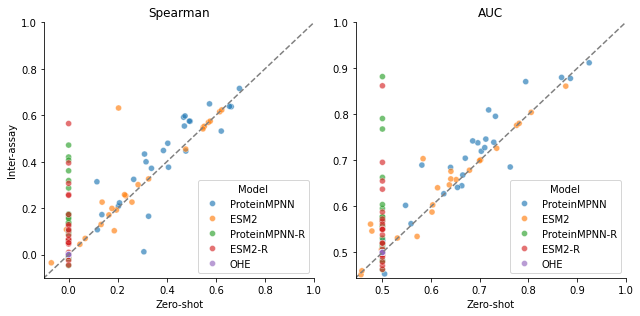

In [45]:
plt.figure(figsize=(9,4.5))
ax = plt.subplot(1,2,1)
sns.scatterplot(x=f'zeroshot_{m1}',y=f'inter-finetuned_{m1}',data=all_zeroshot_inter_metric_df,hue='Model',alpha=0.65)
plt.plot([-0.5,1],[-0.5,1],color='gray',linestyle='--')
plt.xlim(-0.1,1)
plt.ylim(-0.1,1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Zero-shot')
plt.ylabel('Inter-assay')

plt.title(m1)

ax = plt.subplot(1,2,2)

sns.scatterplot(x=f'zeroshot_{m2}',y=f'inter-finetuned_{m2}',data=all_zeroshot_inter_metric_df,hue='Model',alpha=0.65)

plt.plot([-0.5,1],[-0.5,1],color='gray',linestyle='--')
plt.xlim(0.445,1)
plt.ylim(0.445,1)
plt.xlabel('Zero-shot')
plt.ylabel('')
plt.title(m2)
# plt.yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('./results/zeroshot_vs_interfinetune.png',dpi=500)
